In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors

In [430]:
df = pd.read_csv(r'../data/H2.csv')

In [431]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [432]:
df = df.sort_index(axis = 1)

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ADR                          79330 non-null  float64
 1   Adults                       79330 non-null  int64  
 2   Agent                        79330 non-null  object 
 3   ArrivalDateDayOfMonth        79330 non-null  int64  
 4   ArrivalDateMonth             79330 non-null  object 
 5   ArrivalDateWeekNumber        79330 non-null  int64  
 6   ArrivalDateYear              79330 non-null  int64  
 7   AssignedRoomType             79330 non-null  object 
 8   Babies                       79330 non-null  int64  
 9   BookingChanges               79330 non-null  int64  
 10  Children                     79326 non-null  float64
 11  Company                      79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  CustomerType    

In [434]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,79330.0,105.304465,43.602954,0.0,79.2,99.9,126.0,5400.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0
BookingChanges,79330.0,0.187369,0.608620,0.0,0.0,0.0,0.0,21.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
DaysInWaitingList,79330.0,3.226774,20.870890,0.0,0.0,0.0,0.0,391.0
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0


# Data Analysis

### Merging Date Columns

In [435]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May':5, 'June': 6, 'July': 7, 'August': 8,
 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [436]:
df = df.replace({'ArrivalDateMonth' : months})

In [437]:
df['ArrivalDate'] = df['ArrivalDateDayOfMonth'].astype(str) + '/' + df['ArrivalDateMonth'].astype(str) + '/' +  df['ArrivalDateYear'].astype(str)

In [438]:
pd.DataFrame(df['ArrivalDate'])

,ArrivalDate
0,1/7/2015
1,1/7/2015
2,1/7/2015
3,1/7/2015
4,2/7/2015
...,...
79325,30/8/2017
79326,31/8/2017
79327,31/8/2017
79328,31/8/2017


In [440]:
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], dayfirst=True)
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'], dayfirst=True)

In [442]:
df.drop(['ArrivalDateDayOfMonth', 'ArrivalDateMonth', 'ArrivalDateYear'], axis = 1, inplace = True)

## Duplicates

In [443]:
df.duplicated().sum()

25902

In [444]:
df.drop_duplicates(inplace= True)

In [445]:
df.duplicated().sum()

0

## Null Values

In [446]:
df['Children'].isna().sum()

4

In [447]:
df['Children'].replace({np.nan:0}, inplace=True)

In [448]:
df['Country'].isna().sum()

6

In [449]:
df.dropna(axis = 0, inplace= True)

In [450]:
df['Country'].isna().sum()

0

## Data Pre-Processing

In [451]:
df.columns

Index(['ADR', 'Adults', 'Agent', 'ArrivalDateWeekNumber', 'AssignedRoomType',
       'Babies', 'BookingChanges', 'Children', 'Company', 'Country',
       'CustomerType', 'DaysInWaitingList', 'DepositType',
       'DistributionChannel', 'IsCanceled', 'IsRepeatedGuest', 'LeadTime',
       'MarketSegment', 'Meal', 'PreviousBookingsNotCanceled',
       'PreviousCancellations', 'RequiredCarParkingSpaces',
       'ReservationStatus', 'ReservationStatusDate', 'ReservedRoomType',
       'StaysInWeekNights', 'StaysInWeekendNights', 'TotalOfSpecialRequests',
       'ArrivalDate'],
      dtype='object')

In [452]:
metric_features = ['ADR', 'BookingChanges',
                'DaysInWaitingList', 'LeadTime', 'PreviousBookingsNotCanceled',
                'PreviousCancellations', 'StaysInWeekendNights',
                'StaysInWeekNights', 'TotalOfSpecialRequests']
non_metric_features = ['Agent','ArrivalDate','ArrivalDateWeekNumber',  'AssignedRoomType', 'Company', 'Country', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus',
                    'ReservationStatusDate', 'ReservedRoomType', 'Adults', 'Babies','Children', 'RequiredCarParkingSpaces']
y = df['IsCanceled']
df.drop(['IsCanceled'], axis = 1, inplace= True)

In [455]:

space_features = ['Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent',
                'Company', 'CustomerType', 'ReservationStatus' ]
for column in df[space_features].columns:
    df[column] = df[column].map(str.strip)

In [456]:
df[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,53422.0,110.993917,48.057274,0.0,84.0,105.3,134.0,5400.0
BookingChanges,53422.0,0.246397,0.704098,0.0,0.0,0.0,0.0,21.0
DaysInWaitingList,53422.0,1.020347,11.902366,0.0,0.0,0.0,0.0,391.0
LeadTime,53422.0,77.683539,82.113124,0.0,14.0,50.0,118.0,629.0
PreviousBookingsNotCanceled,53422.0,0.191513,2.038911,0.0,0.0,0.0,0.0,72.0
PreviousCancellations,53422.0,0.035772,0.372805,0.0,0.0,0.0,0.0,21.0
StaysInWeekendNights,53422.0,0.872131,0.913671,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,53422.0,2.274363,1.618217,0.0,1.0,2.0,3.0,41.0
TotalOfSpecialRequests,53422.0,0.711055,0.833557,0.0,0.0,1.0,1.0,5.0


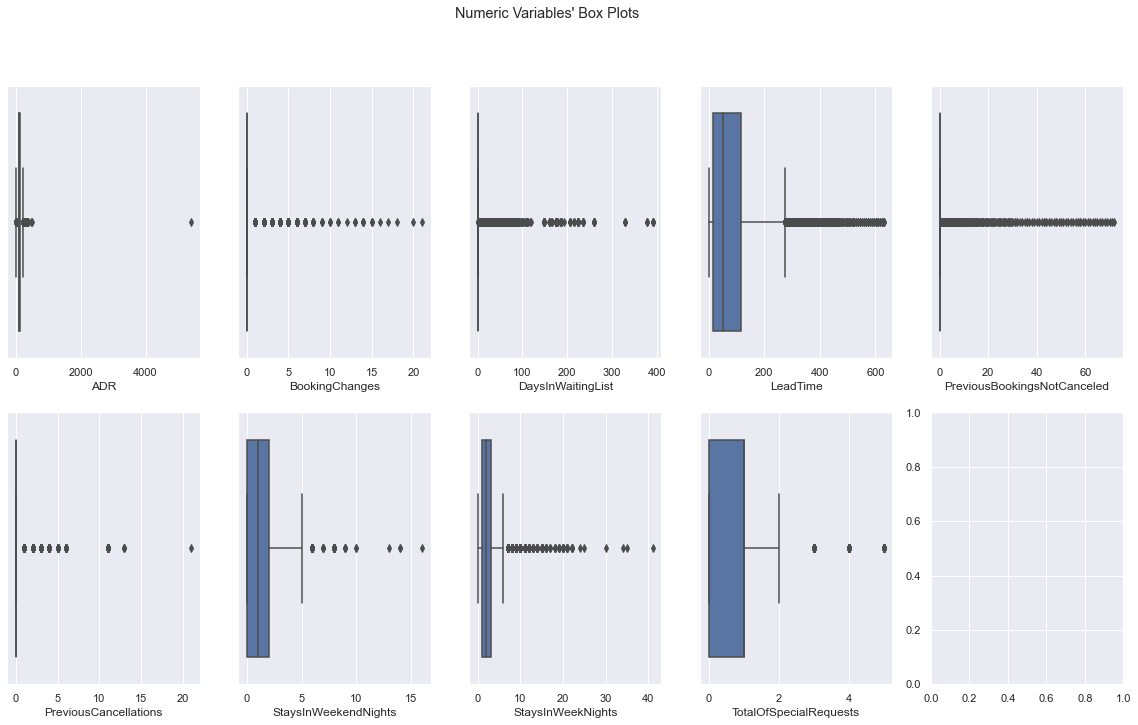

In [457]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

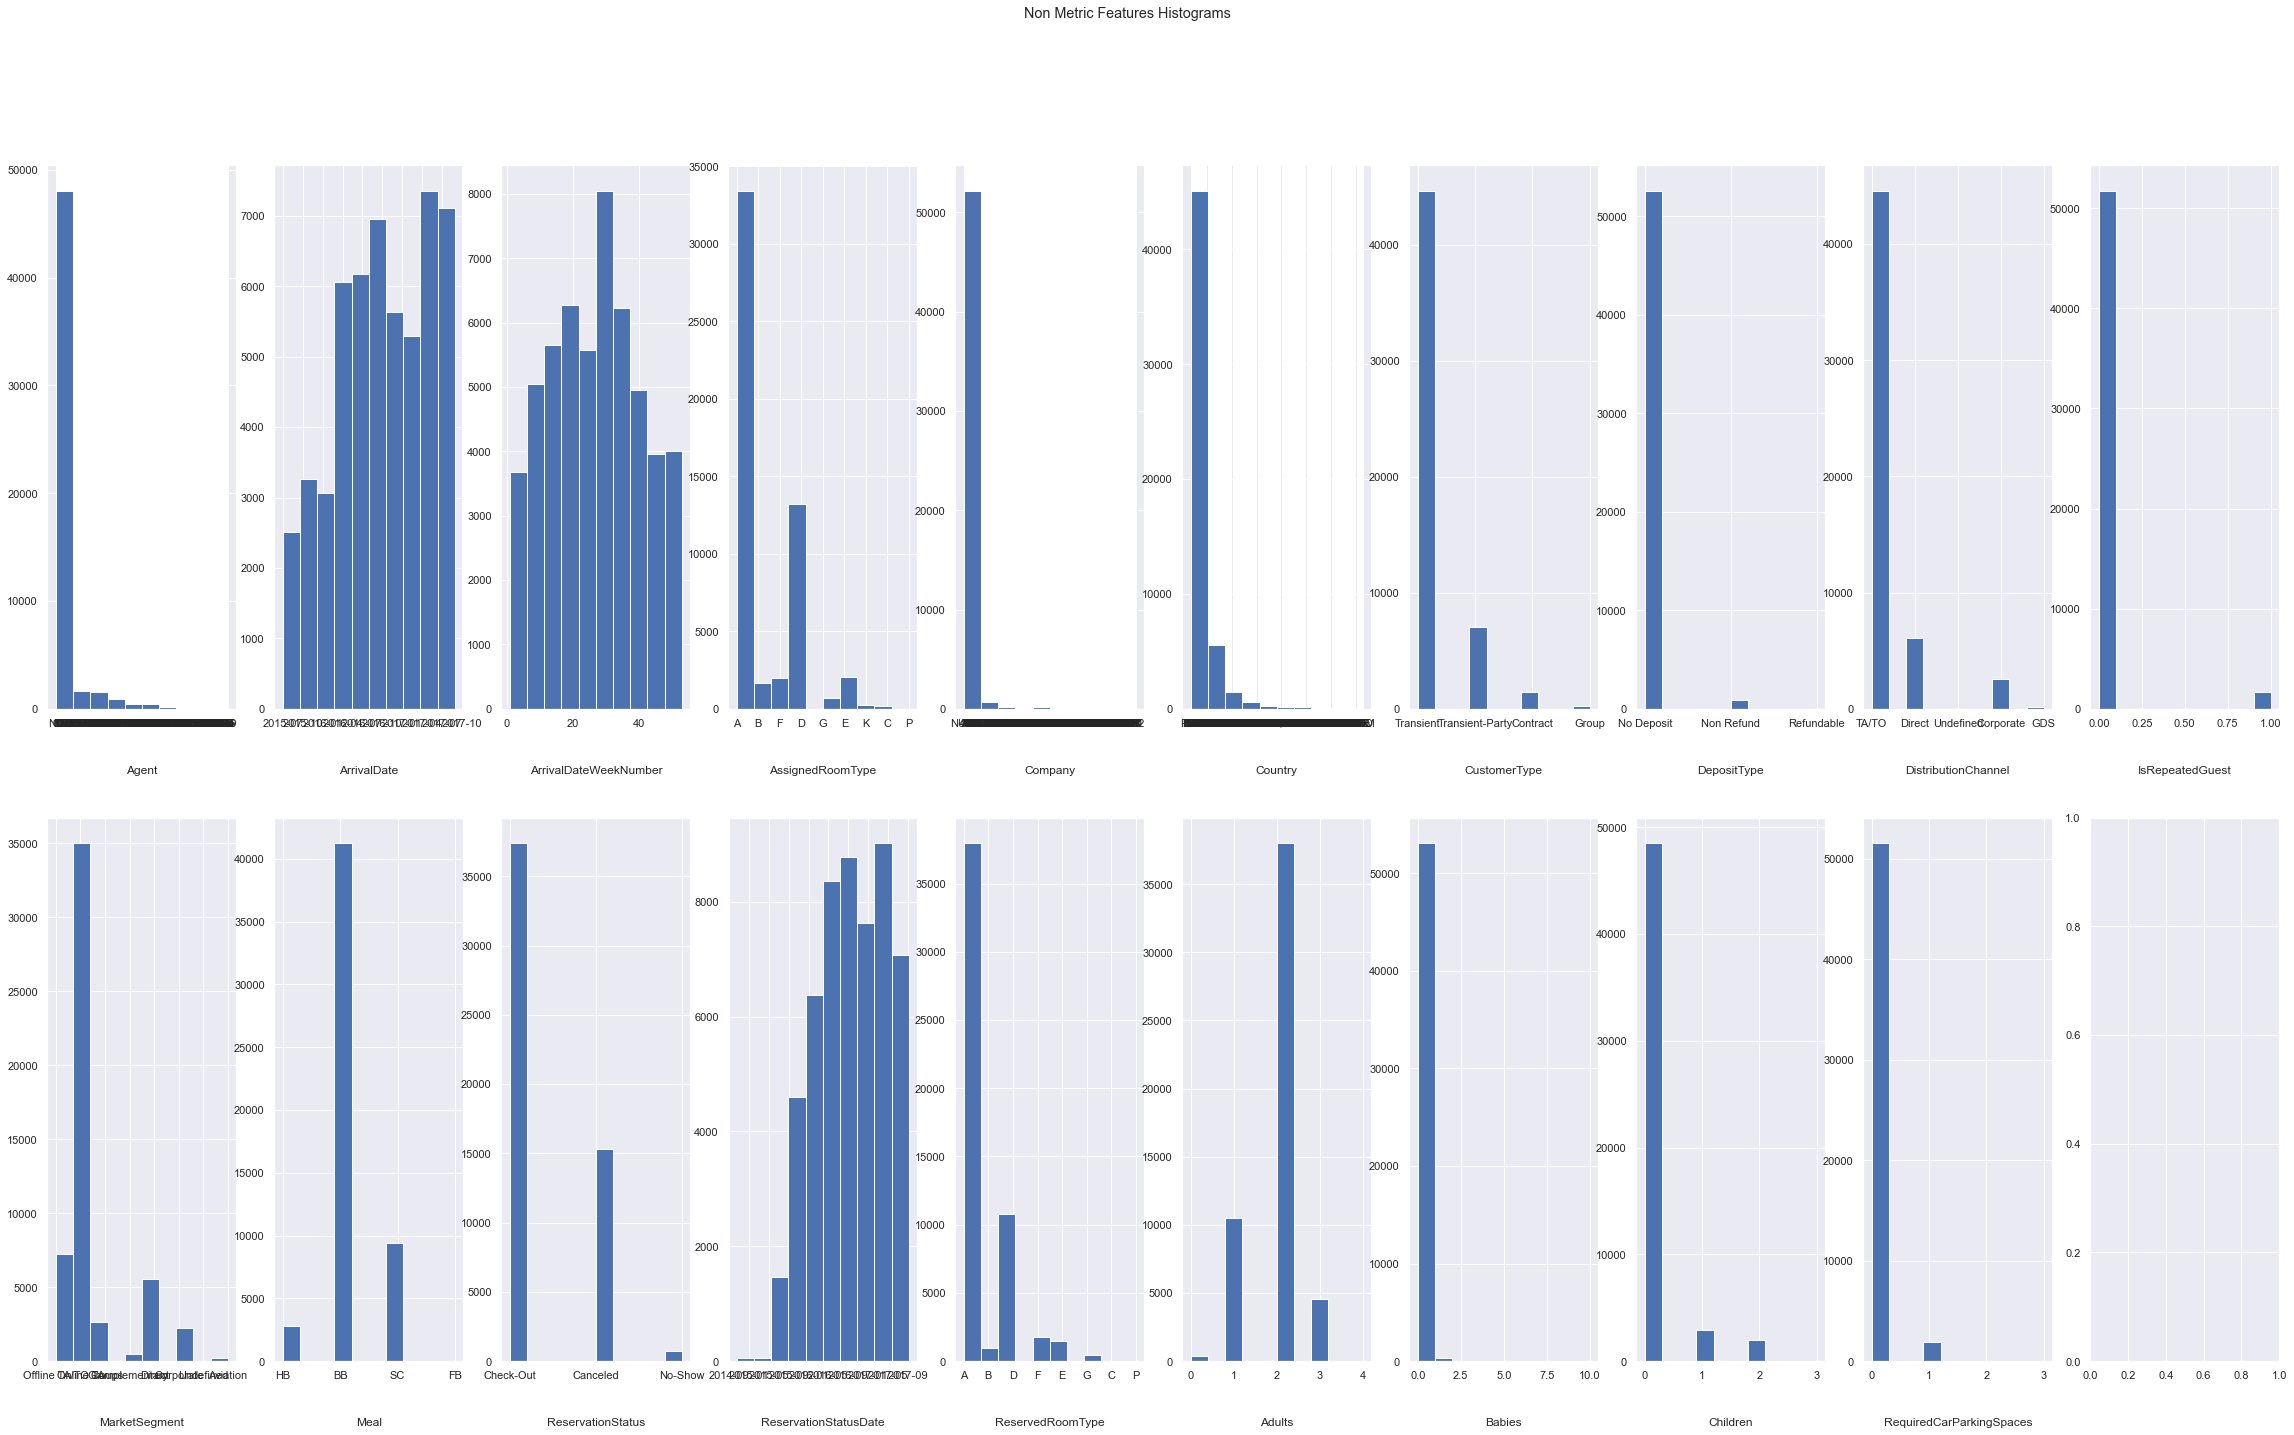

In [458]:
# Non Metric Features Histograms
sns.set()
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(40, 22))

for ax, feat in zip(axes.flatten(), non_metric_features):
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()

## Checking for Outliers in categorical features

#### Reservas só com crianças faz sentido?

In [459]:
index_out = df[(df['Adults'] == 0) & (df['Children'] == 0) ].index

df.drop(index = index_out, axis = 0, inplace = True)

y.drop(index = index_out, axis = 0, inplace = True)

## 151 outliers

In [460]:
index_out = df[df['Adults'] == 4].index

df.drop(index = index_out, axis = 0, inplace = True)

y.drop(index = index_out, axis = 0, inplace = True)

## 30 outliers

In [461]:
df['Babies'].unique()

array([ 0,  1, 10,  9,  2])

#### Variavel com poucos casos diferentes de 0

In [462]:
df.drop('Babies', axis = 1, inplace = True)

In [463]:
df['Meal'].unique()

array(['HB', 'BB', 'SC', 'FB'], dtype=object)

In [464]:
index_out = df[df['Meal'] == 'FB'].index

df.drop(index = index_out, axis = 0, inplace = True)

y.drop(index = index_out, axis = 0, inplace = True)

## 11 outliers

In [465]:
df['DepositType'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [466]:
df[df['DepositType'] == 'Refundable']

,ADR,Adults,Agent,ArrivalDateWeekNumber,AssignedRoomType,BookingChanges,Children,Company,Country,CustomerType,...,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,ReservationStatus,ReservationStatusDate,ReservedRoomType,StaysInWeekNights,StaysInWeekendNights,TotalOfSpecialRequests,ArrivalDate
4559,72.25,2,30,41,D,1,0.0,NULL,AUT,Transient-Party,...,0,0,0,Check-Out,2015-10-11,A,3,0,0,2015-10-08
20471,79.00,1,107,47,A,1,0.0,NULL,PRT,Transient-Party,...,0,0,0,Canceled,2016-07-27,A,4,2,0,2016-11-13
26237,121.67,2,9,16,A,0,0.0,NULL,ESP,Transient,...,0,0,0,Canceled,2017-04-13,A,1,2,2,2017-04-16
26445,99.00,2,9,16,A,0,0.0,NULL,IRL,Transient,...,0,0,0,Canceled,2017-03-30,A,2,0,0,2017-04-21
27810,172.26,2,9,19,D,0,0.0,NULL,BRA,Transient,...,0,0,0,Canceled,2017-05-04,D,4,1,3,2017-05-08
31794,130.00,2,9,28,A,0,0.0,NULL,ESP,Transient,...,0,0,0,Canceled,2017-07-13,A,2,0,1,2017-07-14
32082,139.50,2,14,29,D,0,0.0,NULL,USA,Transient,...,0,0,0,Canceled,2017-07-21,D,1,1,0,2017-07-22
32472,162.67,2,9,31,A,0,0.0,NULL,FRA,Transient,...,0,0,0,Canceled,2017-07-27,A,1,2,2,2017-07-30
32478,100.00,2,10,31,A,0,0.0,NULL,PRT,Transient,...,0,0,0,Canceled,2017-07-29,A,2,2,0,2017-07-30
32529,139.50,3,9,31,D,0,0.0,NULL,FRO,Transient,...,0,0,0,Canceled,2017-07-29,D,10,4,1,2017-07-31


## Checking for Outliers in numerical features

In [467]:
df[df['ADR'] > 4000]

,ADR,Adults,Agent,ArrivalDateWeekNumber,AssignedRoomType,BookingChanges,Children,Company,Country,CustomerType,...,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,ReservationStatus,ReservationStatusDate,ReservedRoomType,StaysInWeekNights,StaysInWeekendNights,TotalOfSpecialRequests,ArrivalDate
8455,5400.0,2,12,13,A,1,0.0,NULL,PRT,Transient,...,0,0,0,Canceled,2016-02-19,A,1,0,0,2016-03-25


In [468]:
df[(df['ReservationStatus'] == 'Canceled') & (df['ReservationStatusDate'] > df['ArrivalDate'])]

,ADR,Adults,Agent,ArrivalDateWeekNumber,AssignedRoomType,BookingChanges,Children,Company,Country,CustomerType,...,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,ReservationStatus,ReservationStatusDate,ReservedRoomType,StaysInWeekNights,StaysInWeekendNights,TotalOfSpecialRequests,ArrivalDate


In [469]:
df[(df['ReservationStatus'] == 'No-Show') & (df['ReservationStatusDate'] < df['ArrivalDate'])]

,ADR,Adults,Agent,ArrivalDateWeekNumber,AssignedRoomType,BookingChanges,Children,Company,Country,CustomerType,...,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,ReservationStatus,ReservationStatusDate,ReservedRoomType,StaysInWeekNights,StaysInWeekendNights,TotalOfSpecialRequests,ArrivalDate


### Checking outliers using DBSCAN

# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=24)
neigh.fit(df)
distances, _ = neigh.kneighbors(df)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

df.shape

#### Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.25, min_samples=24, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

# inserting in the datset with all the datas
df = pd.concat((df.reset_index(), pd.Series(dbscan_labels, name='dbscan_labels')), axis=1).set_index('CustID')

# Concatenating the labels to df
St_DBSCAN = pd.concat([St_DBSCAN, pd.Series(dbscan_labels, index=St_DBSCAN.index, name="dbscan_client_labels")], axis=1)